In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import *
from scipy.stats import entropy as en
d1 =open("accepted.txt")
d2 = open("allowed copy.txt")
accepted_words = []
accepted_words = d1.read().split(' ')
allowed_words = []
allowed_words = d2.read().split(' ')
no_of_aw = len(allowed_words)
y = np.random.rand(1)
y = np.round(y*len(accepted_words))
target= accepted_words[y[0].astype(int)]

In [ ]:
#Test with small package
l = 'abcde'
allowed_words = []
for a in l:
    for b in l:
        for c in l:
            for d in l:
                for e in l:
                    temp = a+b+c+d+e
                    allowed_words.append(temp)

print(allowed_words)

In [ ]:
from itertools import *
def create_pattern_list():
    patterns = []
    values = ['0','1','2']
    for a in values:
        for b in values:
            for c in values:
                for d in values:
                    for e in values:
                        temp = [a,b,c,d,e]
                        patterns.append(temp)
    return patterns

In [50]:
def cpl(x):
    temp_i = x
    patterns = []
    for y in allowed_words:
        #print(y)
        temp = y
        l_c = 0
        t = ['0']*5
        for j in x:
            if(j in temp):
                if(temp_i.index(j)==temp.index(j)):
                    #print(temp_i.index(j),temp.index(j))
                    t[temp.index(j)] = '2'
                elif(temp[l_c] == j):
                    t[l_c] = '2'
                else:
                    t[l_c] = '1'
                temp=temp.replace(j,'#',1)
                #temp_i = temp_i.replace(j,'#',1)

                #print(temp)
            l_c+=1
        q = ''
        for s in t:
            q += s
        if(q not in patterns):
            patterns.append(q)
    return patterns
        
        
    

In [35]:
print(cpl("weary"))

weary
['01100', '00100', '00110', '00110', '00200', '00200', '00200', '00200', '00200', '00200', '00200', '00200', '01200', '00200', '00200', '01200', '00201', '00100', '01100', '01100', '01102', '00100', '01100', '01100', '01110', '01100', '01120', '01100', '00110', '01100', '01100', '01100', '01110', '01100', '01100', '10100', '00100', '01100', '00100', '00100', '00100', '00100', '00120', '01120', '00120', '00100', '01100', '00110', '00112', '00110', '00110', '00110', '01102', '00100', '00100', '01100', '01100', '00100', '00100', '01101', '00101', '00101', '00200', '00220', '00100', '00102', '01120', '01120', '01100', '00110', '01100', '01100', '00100', '00100', '00102', '00100', '00100', '01100', '01110', '01100', '00100', '01100', '01100', '00100', '00100', '00120', '01110', '01110', '00110', '00110', '01100', '00100', '00100', '00110', '01100', '00101', '01200', '00200', '10200', '00201', '00100', '00100', '01100', '01110', '00100', '01100', '01100', '01100', '00100', '01100', '00

In [75]:
def eliminate_1(x,y):
    w = x
    not_exist = []
    exist = ['']*5
    cor = ['']*5
    not_elm = []
    for a in x:
        if(y[x.index(a)] == '0'):
            not_exist.append(a)
            x=x.replace(a,'#',1)
            #print(x)
        elif(y[x.index(a)] == '1'):
            exist[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
        else:
            cor[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
    #print(not_exist,exist,cor)
    
    l_ne = []
    l_e = []
    l_c = []
    for word in allowed_words:
        #print(word, end=' ')
        c=0
        fl=[0]*5
        flag = 0
        for m in cor:
            if(m != ''):
                if(m in word and word[c] == m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in cor:
            if(m != ''):
                if(fl[c] == 1):
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_c.append(word)
    if(l_c == []):
        l_c = allowed_words
    #print(l_c)
    
    for word in l_c:
        #print(word, end=' ')
        c = 0
        fl = [0]*5
        flag = 0
        for m in exist:
            if(m !=''):
                #print(c)
                if(m in word and word[c] != m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in exist:
            if(m != ''):
                if(fl[c] == 1):
                    #print('here')
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_e.append(word)
            
    if(l_e == [] and y != '11111'):
        l_e = l_c
        #l_e = []
    #if(l_e == [] and y == '11111'):
        #l_e = [w]
    #print(l_e)
    temp = l_e
    #print(temp)
    for word in temp:
        #print(word)
        for m in not_exist:
            #print(m)
            count = 0
            count = exist.count(m) + cor.count(m)
            #print(count)
            if(m in word):
                if(count==0):
                    l_ne.append(word)
                    #print("removed cause no existence")
                    break
                elif(count>0):
                    if(word.count(m) > count):
                        #print("removed cause existence more than should be")
                        l_ne.append(word)
                        break
    #print(l_ne)

    return [x for x in l_e if not x in l_ne or l_ne.remove(x)]
                    
    

In [74]:
y = 'weary'
t = '10111'
print((eliminate_1(y,t)))

[]


# entropy

  0%|                                                 | 0/12972 [00:00<?, ?it/s]

aahed


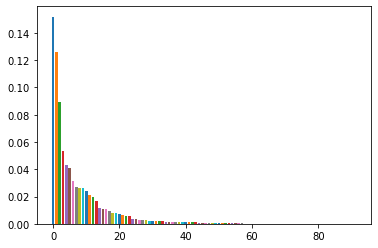

  0%|                                       | 1/12972 [00:00<2:47:07,  1.29it/s]

Information bit:  4.273904230426276
aalii


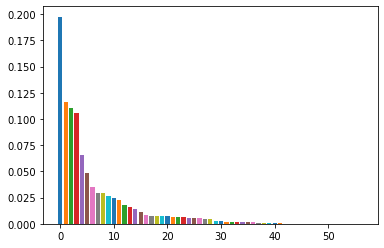

  0%|                                       | 2/12972 [00:01<2:17:41,  1.57it/s]

Information bit:  4.076042509744166
aargh


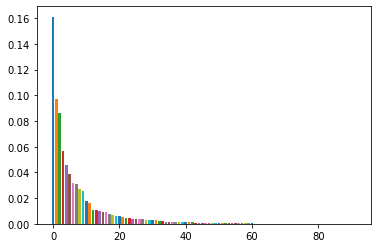

  0%|                                       | 3/12972 [00:02<2:29:15,  1.45it/s]

Information bit:  4.264849755999675
aarti


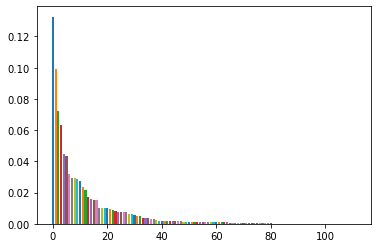

  0%|                                       | 4/12972 [00:02<2:48:02,  1.29it/s]

Information bit:  4.823845067845458
abaca


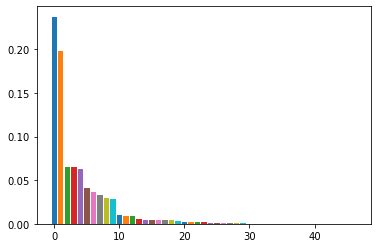

  0%|                                       | 5/12972 [00:03<2:22:39,  1.51it/s]

Information bit:  3.363389637286832
abaci


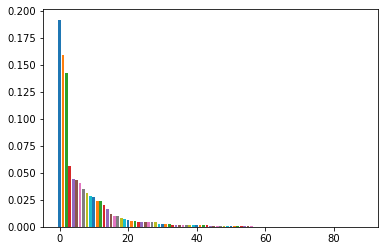

  0%|                                       | 6/12972 [00:04<2:28:55,  1.45it/s]

Information bit:  4.150734686782171
aback


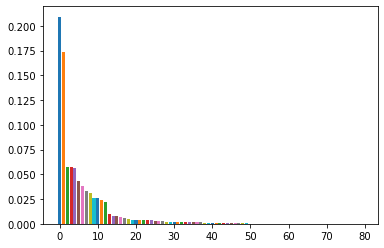

  0%|                                       | 7/12972 [00:04<2:29:16,  1.45it/s]

Information bit:  3.9265316428750388
abacs


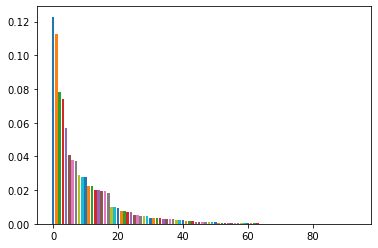

  0%|                                       | 8/12972 [00:05<2:36:17,  1.38it/s]

Information bit:  4.608618985510467
abaft


KeyboardInterrupt: 

In [64]:
from math import *
from tqdm import tqdm
E = {}
for word in tqdm(allowed_words):
    print(word)
    prob = []
    patterns = cpl(word)
    for pattern in patterns:
        sample = eliminate_1(word,pattern)
        prob.append(len(sample)/no_of_aw)
    s_p = prob
    s_p.sort(reverse=True)
    plt.figure()
    for i in range(len(s_p)):
        plt.bar(i,s_p[i])
    plt.show()
    
    #entropy
    
    e = en(prob,base=2)
    print("Information bit: ",e)
    E.update({word:e})


In [55]:
from math import *
E = {}
for word in tqdm(allowed_words):
    patterns = cpl(word)
    print(word)
    prob = []
    for pattern in patterns:
        sample = eliminate_1(word,pattern)
        prob.append(len(sample)/no_of_aw)


    #entropy
    
    e = 0
    for i in tqdm(prob):
        if(i != 0):
            e = e - i*log2(i)
        else:
            e = e - i*log2(i+1)
    #print("Information bit: ",e)
    E.update({word:e})

  0%|                                                 | 0/12972 [00:00<?, ?it/s]

aahed



  0%|                                       | 1/12972 [00:00<2:30:06,  1.44it/s]

aalii



  0%|                                       | 2/12972 [00:01<1:59:10,  1.81it/s]

aargh



  0%|                                       | 3/12972 [00:01<2:09:18,  1.67it/s]

aarti



  0%|                                       | 4/12972 [00:02<2:26:04,  1.48it/s]

abaca



  0%|                                       | 5/12972 [00:02<1:59:52,  1.80it/s]

abaci



  0%|                                       | 6/12972 [00:03<2:05:44,  1.72it/s]

aback



  0%|                                       | 7/12972 [00:04<2:05:31,  1.72it/s]

abacs



  0%|                                       | 8/12972 [00:04<2:14:12,  1.61it/s]

abaft



  0%|                                       | 9/12972 [00:05<2:10:23,  1.66it/s]

abaka



  0%|                                      | 10/12972 [00:05<1:52:16,  1.92it/s]

abamp



  0%|                                      | 11/12972 [00:06<1:54:44,  1.88it/s]

aband



  0%|                                      | 12/12972 [00:06<2:03:45,  1.75it/s]

abase



  0%|                                      | 13/12972 [00:07<2:15:45,  1.59it/s]

abash



  0%|                                      | 14/12972 [00:08<2:19:51,  1.54it/s]

abask



  0%|                                      | 15/12972 [00:09<2:23:12,  1.51it/s]

abate



  0%|                                      | 16/12972 [00:09<2:28:49,  1.45it/s]

abaya



  0%|                                      | 17/12972 [00:10<2:07:25,  1.69it/s]

abbas



  0%|                                      | 18/12972 [00:10<2:03:31,  1.75it/s]

abbed



  0%|                                      | 19/12972 [00:11<2:05:35,  1.72it/s]

abbes



  0%|                                      | 20/12972 [00:12<2:12:18,  1.63it/s]

abbey



  0%|                                      | 21/12972 [00:12<2:12:59,  1.62it/s]

abbot



  0%|                                      | 22/12972 [00:13<2:11:31,  1.64it/s]

abcee



  0%|                                      | 23/12972 [00:13<2:11:54,  1.64it/s]

abeam



  0%|                                      | 24/12972 [00:14<2:17:08,  1.57it/s]

abear



  0%|                                      | 25/12972 [00:15<2:26:32,  1.47it/s]

abele



  0%|                                      | 26/12972 [00:16<2:30:36,  1.43it/s]

abers



  0%|                                      | 27/12972 [00:17<2:56:44,  1.22it/s]

abets



  0%|                                      | 28/12972 [00:18<3:12:39,  1.12it/s]

abhor



  0%|                                      | 29/12972 [00:19<3:09:28,  1.14it/s]

abide



  0%|                                      | 30/12972 [00:20<3:14:42,  1.11it/s]

abies



  0%|                                      | 31/12972 [00:21<3:24:31,  1.05it/s]

abled



  0%|                                      | 32/12972 [00:22<3:27:16,  1.04it/s]

abler



  0%|                                      | 33/12972 [00:23<3:30:19,  1.03it/s]

ables



  0%|                                      | 34/12972 [00:24<3:38:38,  1.01s/it]

ablet



  0%|                                      | 35/12972 [00:25<3:39:02,  1.02s/it]

ablow



  0%|                                      | 36/12972 [00:25<3:21:16,  1.07it/s]

abmho



  0%|                                      | 37/12972 [00:26<3:10:40,  1.13it/s]

abode



  0%|                                      | 38/12972 [00:27<3:15:12,  1.10it/s]

abohm



  0%|                                      | 39/12972 [00:28<3:08:12,  1.15it/s]

aboil



  0%|                                      | 40/12972 [00:29<3:11:41,  1.12it/s]

aboma



  0%|                                      | 41/12972 [00:30<2:56:08,  1.22it/s]

aboon



  0%|                                      | 42/12972 [00:30<2:43:23,  1.32it/s]

abord



  0%|▏                                     | 43/12972 [00:31<2:58:19,  1.21it/s]

abore



  0%|▏                                     | 44/12972 [00:32<3:11:02,  1.13it/s]

abort



  0%|▏                                     | 45/12972 [00:33<3:17:19,  1.09it/s]

about



  0%|▏                                     | 46/12972 [00:34<3:14:01,  1.11it/s]

above



  0%|▏                                     | 47/12972 [00:35<3:08:10,  1.14it/s]

abram



  0%|▏                                     | 48/12972 [00:36<2:57:25,  1.21it/s]

abray



  0%|▏                                     | 49/12972 [00:36<2:49:26,  1.27it/s]

abrim



  0%|▏                                     | 50/12972 [00:37<2:58:24,  1.21it/s]

abrin



  0%|▏                                     | 51/12972 [00:38<3:07:06,  1.15it/s]

abris



  0%|▏                                     | 52/12972 [00:39<3:20:57,  1.07it/s]

absey



  0%|▏                                     | 53/12972 [00:40<3:25:27,  1.05it/s]

absit



  0%|▏                                     | 54/12972 [00:41<3:29:06,  1.03it/s]

abuna



  0%|▏                                     | 55/12972 [00:42<3:08:02,  1.14it/s]

abune



  0%|▏                                     | 56/12972 [00:43<3:09:36,  1.14it/s]

abuse



  0%|▏                                     | 57/12972 [00:44<3:17:14,  1.09it/s]

abuts



  0%|▏                                     | 58/12972 [00:45<3:24:37,  1.05it/s]

abuzz



  0%|▏                                     | 59/12972 [00:45<2:47:34,  1.28it/s]

abyes



  0%|▏                                     | 60/12972 [00:46<3:03:24,  1.17it/s]

abysm



  0%|▏                                     | 61/12972 [00:47<3:00:44,  1.19it/s]

abyss



  0%|▏                                     | 62/12972 [00:48<2:49:27,  1.27it/s]

acais



  0%|▏                                     | 63/12972 [00:49<2:48:57,  1.27it/s]

acari



  0%|▏                                     | 64/12972 [00:49<2:47:02,  1.29it/s]

accas



  1%|▏                                     | 65/12972 [00:50<2:30:21,  1.43it/s]

accoy



  1%|▏                                     | 66/12972 [00:50<2:26:08,  1.47it/s]

acerb



  1%|▏                                     | 67/12972 [00:51<2:42:33,  1.32it/s]

acers



  1%|▏                                     | 68/12972 [00:53<3:10:03,  1.13it/s]

aceta



  1%|▏                                     | 69/12972 [00:53<3:02:26,  1.18it/s]

achar



  1%|▏                                     | 70/12972 [00:54<2:51:15,  1.26it/s]

ached



  1%|▏                                     | 71/12972 [00:55<2:59:47,  1.20it/s]

aches



  1%|▏                                     | 72/12972 [00:56<3:12:01,  1.12it/s]

achoo



  1%|▏                                     | 73/12972 [00:57<2:51:35,  1.25it/s]

acids



  1%|▏                                     | 74/12972 [00:58<3:06:20,  1.15it/s]

acidy



  1%|▏                                     | 75/12972 [00:58<3:05:23,  1.16it/s]

acing



  1%|▏                                     | 76/12972 [00:59<3:05:41,  1.16it/s]

acini



  1%|▏                                     | 77/12972 [01:00<2:51:44,  1.25it/s]

ackee



  1%|▏                                     | 78/12972 [01:01<2:41:05,  1.33it/s]

acker



  1%|▏                                     | 79/12972 [01:01<2:52:25,  1.25it/s]

acmes



  1%|▏                                     | 80/12972 [01:03<3:09:01,  1.14it/s]

acmic



  1%|▏                                     | 81/12972 [01:03<2:49:28,  1.27it/s]

acned



  1%|▏                                     | 82/12972 [01:04<3:05:09,  1.16it/s]

acnes



  1%|▏                                     | 83/12972 [01:05<3:23:00,  1.06it/s]

acock



  1%|▏                                     | 84/12972 [01:06<3:00:18,  1.19it/s]

acold



  1%|▏                                     | 85/12972 [01:07<3:10:52,  1.13it/s]

acorn



  1%|▎                                     | 86/12972 [01:08<3:20:51,  1.07it/s]

acred



  1%|▎                                     | 87/12972 [01:09<3:33:48,  1.00it/s]

acres



  1%|▎                                     | 88/12972 [01:10<3:47:44,  1.06s/it]

acrid



  1%|▎                                     | 89/12972 [01:11<3:47:21,  1.06s/it]

acros



  1%|▎                                     | 90/12972 [01:12<3:53:18,  1.09s/it]

acted



  1%|▎                                     | 91/12972 [01:13<3:45:43,  1.05s/it]

actin



  1%|▎                                     | 92/12972 [01:14<3:46:06,  1.05s/it]

acton



  1%|▎                                     | 93/12972 [01:16<3:44:59,  1.05s/it]

actor



  1%|▎                                     | 94/12972 [01:17<3:44:21,  1.05s/it]

acute



  1%|▎                                     | 95/12972 [01:18<3:40:31,  1.03s/it]

acyls



  1%|▎                                     | 96/12972 [01:18<3:34:42,  1.00s/it]

adage



  1%|▎                                     | 97/12972 [01:19<3:12:21,  1.12it/s]

adapt



  1%|▎                                     | 98/12972 [01:20<2:56:30,  1.22it/s]

adaws



  1%|▎                                     | 99/12972 [01:20<2:48:39,  1.27it/s]

adays



  1%|▎                                    | 100/12972 [01:21<2:44:40,  1.30it/s]

adbot



  1%|▎                                    | 101/12972 [01:22<2:50:44,  1.26it/s]

addax



  1%|▎                                    | 102/12972 [01:22<2:23:30,  1.49it/s]

added



  1%|▎                                    | 103/12972 [01:23<2:05:47,  1.71it/s]

adder



  1%|▎                                    | 104/12972 [01:24<2:14:27,  1.59it/s]

addio



  1%|▎                                    | 105/12972 [01:24<2:18:08,  1.55it/s]

addle



  1%|▎                                    | 106/12972 [01:25<2:20:14,  1.53it/s]

adeem



  1%|▎                                    | 107/12972 [01:26<2:23:15,  1.50it/s]

adept



  1%|▎                                    | 108/12972 [01:27<2:41:32,  1.33it/s]

adhan



  1%|▎                                    | 109/12972 [01:27<2:34:34,  1.39it/s]

adieu



  1%|▎                                    | 110/12972 [01:28<2:45:23,  1.30it/s]

adios



  1%|▎                                    | 111/12972 [01:29<3:07:35,  1.14it/s]

adits



  1%|▎                                    | 112/12972 [01:30<3:21:51,  1.06it/s]

adman



  1%|▎                                    | 113/12972 [01:31<3:07:50,  1.14it/s]

admen



  1%|▎                                    | 114/12972 [01:32<3:17:15,  1.09it/s]

admin


  1%|▎                                    | 114/12972 [01:33<2:55:03,  1.22it/s]


KeyboardInterrupt: 

trace


100%|████████████████████████████████████████| 176/176 [00:01<00:00, 137.57it/s]


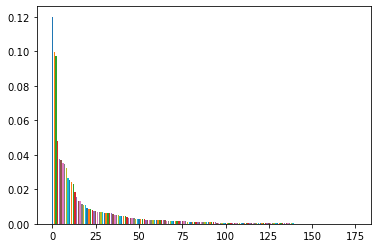

Information bit:  5.379470875914944


In [78]:
word = 'trace'
print(word)
prob = []
patterns = cpl(word)
for pattern in tqdm(patterns):
    sample = eliminate_1(word,pattern)
    prob.append(len(sample)/no_of_aw)
s_p = prob
s_p.sort(reverse=True)
plt.figure()
for i in range(len(s_p)):
    plt.bar(i,s_p[i])
plt.show()
    
#entropy
    
e = en(prob,base=2)
print("Information bit: ",e)
E.update({word:e})

In [ ]:
print(patterns[94])

In [37]:
print('10111' in cpl("weary"))

weary
False


In [ ]:
print(len(allowed_words))